In [1]:
#importing libraries for machine learning algorithm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("FuelConsumptionCo2.csv") #loading csv data into dataframes
df.head() #first five rows
df.tail() #last five rows
df[34:42] #using slicing for specific rows
df['MAKE'] #for specific columns
df[['MAKE','MODEL']] #for multiple speciifc columns
df.columns #for columns names
df.ENGINESIZE #for specific column

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

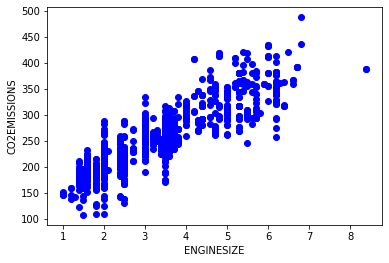

In [3]:
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'],color='blue') #plotting scatter plot to check label
plt.xlabel('ENGINESIZE') #labeling xaxis
plt.ylabel('CO2EMISSIONS') #labeling yaxis
plt.show() # to show the plot 

In [4]:
#for splitting dataset into test and train
mask=np.random.rand(len(df))<0.8 
train=df[mask]#train dataset having data 80 %
test=df[~mask]#test dataset having data 20 % which is exclusive from training dataset

In [5]:
from sklearn.preprocessing import PolynomialFeatures #importing library for ML of Poly regression
from sklearn import linear_model #import ML library for linear model
train_x=np.asanyarray(train[['ENGINESIZE']]) #convering train enginesize into array
train_y=np.asanyarray(train[['CO2EMISSIONS']]) #converting train target co2emissions into array
poly=PolynomialFeatures(degree=2) #polynmial features of degree 2
train_x_poly=poly.fit_transform(train_x) # converting train_x into 1+x+x**2
print(train_x[0:5])
print(train_x_poly)

[[2. ]
 [2.4]
 [1.5]
 [3.5]
 [3.5]]
[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.2  10.24]
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]]


In [6]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)
train_y_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(clf.coef_)
print(clf.intercept_)

[[ 0.        48.9611569 -1.1933663]]
[108.61649852]


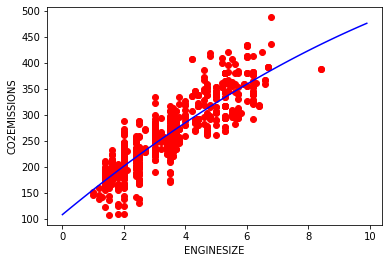

In [16]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")#scatter plot as engine size vs co2
xx=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)#ploting fit line as x+x1+x2
plt.plot(xx,yy,'-b')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [17]:
#importing libraries for evaluation 
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']]) #converting test_x into array
test_y=np.asanyarray(test[['CO2EMISSIONS']]) #converting test_y into array

In [32]:
test_x_poly=poly.fit_transform(test_x) #converting test_x into 1+x+x*2
test_y_=clf.predict(test_x_poly) #predicting coefficients for test_y_
print(test_y_[0:10])#comparing 1st ten of predicted test_y
print(test_y[0:10])#actual test_y

[[312.37247429]
 [355.94624319]
 [201.76534711]
 [201.76534711]
 [244.75967248]
 [244.75967248]
 [244.75967248]
 [244.75967248]
 [330.94588954]
 [293.2023759 ]]
[[354]
 [359]
 [230]
 [235]
 [224]
 [246]
 [304]
 [294]
 [409]
 [306]]


In [34]:
#evaluation methods
print(np.mean(np.absolute(test_y_-test_y))) #mean absolute error
print(np.mean((test_y_-test_y)**2)) #residual sum of squares
print(r2_score(test_y_))

23.003678738019186
970.5594399530904
